# Preparation

In [1]:

dataset = 'fraud'
ntrain = 0 ; latent_dim = 3
num_params_conv = 5
cost_func = 'qae'
steps = 500
learning_rate = 0.001
batch_size = 16


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import libraries

from pennylane import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pennylane as qml

c:\Users\user1\anaconda3\envs\venv\Lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [4]:
import sys
sys.version

'3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]'

In [5]:
pwd

'c:\\Users\\user1\\Quantum\\QSVDD\\QSVDD_final'

In [6]:
import pandas as pd
data= pd.read_csv('./creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
print('No Frauds', round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Frauds', round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


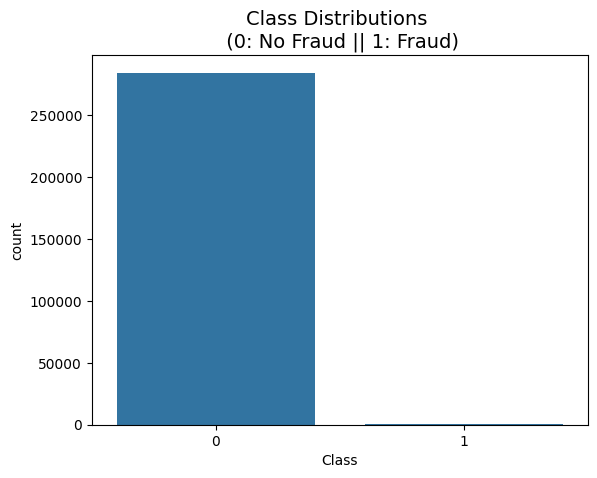

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')

sns.countplot(x='Class', data=data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

plt.show()


In [9]:
tmp = data[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

In [10]:
class_0.describe()


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
class_1.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
X = data.drop("Class", axis=1)
y = data['Class']

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [14]:

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

print('y value counts:')
print(y.value_counts())

X shape: (284807, 30)
y shape: (284807,)
y value counts:
Class
0    284315
1       492
Name: count, dtype: int64


In [15]:

normal_indices = y[y == 0].index
abnormal_indices = y[y == 1].index

X_train_normal_indices = np.random.choice(normal_indices, 1000, replace=False)
X_train_normal = X[X_train_normal_indices]
y_train_normal = y[X_train_normal_indices]

X_train = X_train_normal
Y_train = y_train_normal

remaining_normal_indices = list(set(normal_indices) - set(X_train_normal_indices))
X_test_normal_indices = np.random.choice(remaining_normal_indices, 100, replace=False)
X_test_normal = X[X_test_normal_indices]
y_test_normal = y[X_test_normal_indices]

X_test_abnormal_indices = np.random.choice(abnormal_indices, 100, replace=False)
X_test_abnormal = X[X_test_abnormal_indices]
y_test_abnormal = y[X_test_abnormal_indices]

X_test = np.concatenate((X_test_normal, X_test_abnormal), axis=0)
Y_test = np.concatenate((y_test_normal, y_test_abnormal), axis=0)


center = qml.numpy.zeros(latent_dim, requires_grad=True)
center_train = np.tile(center,(len(X_train),1))

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')
print(f'X_test_normal shape: {X_test_normal.shape}')
print(f'X_test_abnormal shape: {X_test_abnormal.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'Y_test shape: {Y_test.shape}')
print(f'center_train shape: {center_train.shape}')


X_train shape: (1000, 30)
Y_train shape: (1000,)
X_test_normal shape: (100, 30)
X_test_abnormal shape: (100, 30)
X_test shape: (200, 30)
Y_test shape: (200,)
center_train shape: (1000, 3)


In [16]:
# Unitary

def U_SU4(params, wires): # 15 params
    qml.U3(params[0], params[1], params[2], wires=wires[0])
    qml.U3(params[3], params[4], params[5], wires=wires[1])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.RY(params[6], wires=wires[0])
    qml.RZ(params[7], wires=wires[1])
    qml.CNOT(wires=[wires[1], wires[0]])
    qml.RY(params[8], wires=wires[0])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.U3(params[9], params[10], params[11], wires=wires[0])
    qml.U3(params[12], params[13], params[14], wires=wires[1])

from itertools import combinations
def U_QAE(params): # params: 14
    nqubits = 5
    ntrash = 3
    for i in range(nqubits):
        qml.RY(params[i], wires = i)
        
    for i,j in combinations(range(0, ntrash), 2): # CZ between trash qubits
        qml.CZ(wires = [i, j])
        
    for idx in range(ntrash): # CZ between trash and non-trash qubits
        for i in range(ntrash):
            for j in range(ntrash+i,nqubits,ntrash):
                qml.CZ(wires = [(idx+i)%(ntrash),j])       

def U_QAE_last(params):
    ntrash = 3
    for i in range(ntrash):
        qml.RY(params[i], wires = i)

In [17]:
# Convolution layer

def conv_layer_1(U, params):
    U(params, wires=[0,1])
    U(params, wires=[2,3])
    U(params, wires=[4,0])
    U(params, wires=[1,2])
    U(params, wires=[3,4])
    
def conv_layer_2(U, params):
    U(params, wires=[0,1])
    U(params, wires=[2,3])
    U(params, wires=[0,3])
    U(params, wires=[1,2])
    
def conv_layer_3(U, params):
    U(params, wires=[0,1])
    
def QCNN_structure_without_pooling(U, params, U_params): #75
    param1 = params[0:U_params]
    param2 = params[U_params: 2 * U_params]
    param3 = params[2 * U_params: 3 * U_params]
    param4 = params[3 * U_params: 4 * U_params]
    param5 = params[4 * U_params: 5 * U_params]

    conv_layer_1(U, param1)
    conv_layer_1(U, param2)
    conv_layer_2(U, param3)
    conv_layer_2(U, param4)
    conv_layer_3(U, param5)
    
def QSVDD_QAE(U, params, U_params):
    param1 = params[0:U_params]
    param2 = params[U_params: 2 * U_params]
    param3 = params[2 * U_params: 3 * U_params]
    param4 = params[3 * U_params: 4 * U_params]
    param5 = params[4 * U_params: 5 * U_params]    
    param6 = params[5 * U_params: 6 * U_params]
    param7 = params[6 * U_params: 7 * U_params]
    param8 = params[7 * U_params: 8 * U_params]
    param9 = params[8 * U_params: 9 * U_params]
    param10 = params[9 * U_params: 10 * U_params]
    param11 = params[10 * U_params: 11 * U_params]
    param12 = params[11 * U_params: 12 * U_params]
    param13 = params[12 * U_params: 13 * U_params]
    param14 = params[13 * U_params: 14 * U_params]
    param15 = params[14 * U_params: 15 * U_params]
    param16 = params[15 * U_params: 78]
    
    U_QAE(param1)
    U_QAE(param2)
    U_QAE(param3)
    U_QAE(param4)
    U_QAE(param5)
    U_QAE(param6)
    U_QAE(param7)
    U_QAE(param8)
    U_QAE(param9)
    U_QAE(param10)
    U_QAE(param11)
    U_QAE(param12)
    U_QAE(param13)
    U_QAE(param14)
    U_QAE(param15)
    U_QAE_last(param16)


# Training

In [18]:

def qae_loss(Y, predictions):
    loss = 0
    for l, p in zip(Y, predictions):
        loss = loss + (-np.sum(p))
    loss = loss / len(Y)
    return loss

def svdd_loss(Y, predictions):
    loss = 0
    for l, p in zip(Y, predictions):
        loss = loss + np.sum(np.array(p-l)**2)
    loss = loss / len(Y)
    return loss

    # Cost
def cost(params, X, Y, U_params, latent_dim, cost_fn):
    predictions = np.array([QCNN(x, params, U_params, latent_dim, cost_fn) for x in X])
    if cost_fn == 'qae':
        loss_value = qae_loss(Y, predictions)

    elif cost_fn == 'svdd':

        loss_value = np.square(np.subtract(predictions, Y)).mean()
    return loss_value
def circuit_training(X_train, Y_train, U_params, cost_fn, latent_dim):

    if cost_fn == 'qae':
        params = np.random.randn(78, requires_grad = True)

    elif cost_fn == 'svdd':    
        params = np.random.randn(U_params * 5, requires_grad = True)
    opt = qml.AdamOptimizer(stepsize=learning_rate)    
    param_history= [params]
    loss_history = []

    for it in range(steps):

        batch_index = np.random.randint(0, len(X_train), (batch_size,))
        X_batch = np.array([X_train[i] for i in batch_index])
        Y_batch = np.array([Y_train[i] for i in batch_index])

        params, cost_new = opt.step_and_cost(lambda v: cost(v, X_batch, Y_batch, U_params, latent_dim, cost_fn), params)
        param_history.append(params)
        loss_history.append(cost_new)


        print("iteration: ", it, " cost: ", cost_new)


    return loss_history, params, param_history


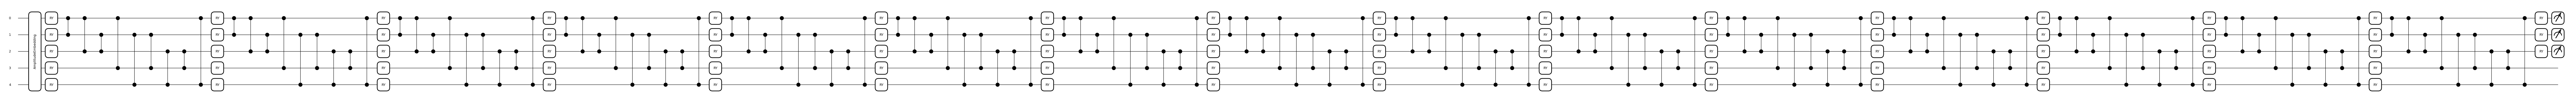

In [19]:
import pennylane as qml


dev = qml.device('default.qubit', wires=5)

@qml.qnode(dev, interface='autograd', diff_method='backprop')
def QCNN(X, params, U_params, latent_dim, cost_fn):
    qml.AmplitudeEmbedding(X, wires=range(5), pad_with=0., normalize=True)
    
    if cost_fn == 'qae':
        QSVDD_QAE(U_QAE, params, U_params)
        result = [qml.expval(qml.PauliZ(i)) for i in range(3)]
    elif cost_fn == 'qae_test':
        QSVDD_QAE(U_QAE, params, U_params)
        if latent_dim == 9:
            result = [qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(4)), qml.expval(qml.PauliY(4)), qml.expval(qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4))]
        elif latent_dim == 3:
            result = [qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4))]
        elif latent_dim == 12:
            result = [qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(4)), qml.expval(qml.PauliY(4)), qml.expval(qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliY(4)), qml.expval(qml.PauliY(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliX(4))]
        elif latent_dim == 15:
            result = [qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(4)), qml.expval(qml.PauliY(4)), qml.expval(qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliY(4)), qml.expval(qml.PauliY(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliX(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliZ(4)), qml.expval(qml.PauliY(3) @ qml.PauliX(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliY(4))]

    elif cost_fn == 'svdd':
        QCNN_structure_without_pooling(U_SU4, params, U_params)
        if latent_dim == 1:
            result = qml.expval(qml.PauliZ(3))
        elif latent_dim == 3:
            result = qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1))
        elif latent_dim == 6:
            result = [qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3))]
        elif latent_dim == 9:
            result = [qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0)),
                      qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(0) @ qml.PauliX(1)), qml.expval(qml.PauliY(0) @ qml.PauliY(1)),
                      qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]
        elif latent_dim == 12:
            result = [qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliX(3)), qml.expval(qml.PauliY(1) @ qml.PauliY(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliY(3)), qml.expval(qml.PauliY(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliX(3))]
        elif latent_dim == 15:
            result = [qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliX(3)), qml.expval(qml.PauliY(1) @ qml.PauliY(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliY(3)), qml.expval(qml.PauliY(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliX(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliZ(3)), qml.expval(qml.PauliY(1) @ qml.PauliX(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliY(3))]

    return result


fig, ax = qml.draw_mpl(QCNN)([0.5]*5, [0.1]*78, 5, 9, 'qae')
plt.show()

In [20]:
import pennylane as qml
from pennylane import numpy as np


dev = qml.device('default.qubit', wires=5)

@qml.qnode(dev, interface='autograd', diff_method='backprop')
def QCNN(X, params, U_params, latent_dim, cost_fn):

    qml.AmplitudeEmbedding(X, wires=range(5), pad_with=0., normalize=True)
        
    if cost_fn == 'qae':
        QSVDD_QAE(U_QAE, params, U_params)
        result = [qml.expval(qml.PauliZ(i)) for i in range(3)]
    elif cost_fn == 'qae_test':
        QSVDD_QAE(U_QAE, params, U_params)
        if latent_dim == 9:
            result = [qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(4)), qml.expval(qml.PauliY(4)), qml.expval(qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4))]
        elif latent_dim == 3:
            result = [qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4))]
        elif latent_dim == 12:
            result = [qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(4)), qml.expval(qml.PauliY(4)), qml.expval(qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliY(4)), qml.expval(qml.PauliY(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliX(4))]
        elif latent_dim == 15:
            result = [qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(4)), qml.expval(qml.PauliY(4)), qml.expval(qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliX(4)), qml.expval(qml.PauliY(3) @ qml.PauliY(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliY(4)), qml.expval(qml.PauliY(3) @ qml.PauliZ(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliX(4)),
                      qml.expval(qml.PauliX(3) @ qml.PauliZ(4)), qml.expval(qml.PauliY(3) @ qml.PauliX(4)),
                      qml.expval(qml.PauliZ(3) @ qml.PauliY(4))]

    elif cost_fn == 'svdd':
        QCNN_structure_without_pooling(U_SU4, params, U_params)
        if latent_dim == 1:
            result = qml.expval(qml.PauliZ(3))
        elif latent_dim == 3:
            result = qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1))
        elif latent_dim == 6:
            result = [qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3))]
        elif latent_dim == 9:
            result = [qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0)),
                      qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(0) @ qml.PauliX(1)), qml.expval(qml.PauliY(0) @ qml.PauliY(1)),
                      qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))]
        elif latent_dim == 12:
            result = [qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliX(3)), qml.expval(qml.PauliY(1) @ qml.PauliY(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliY(3)), qml.expval(qml.PauliY(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliX(3))]
        elif latent_dim == 15:
            result = [qml.expval(qml.PauliX(1)), qml.expval(qml.PauliY(1)), qml.expval(qml.PauliZ(1)),
                      qml.expval(qml.PauliX(3)), qml.expval(qml.PauliY(3)), qml.expval(qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliX(3)), qml.expval(qml.PauliY(1) @ qml.PauliY(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliY(3)), qml.expval(qml.PauliY(1) @ qml.PauliZ(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliX(3)),
                      qml.expval(qml.PauliX(1) @ qml.PauliZ(3)), qml.expval(qml.PauliY(1) @ qml.PauliX(3)),
                      qml.expval(qml.PauliZ(1) @ qml.PauliY(3))]

    return result

train_Xdata = X_train
train_Ydata = center_train


loss_history, est_params, param_history = circuit_training(X_train=train_Xdata,
                                            Y_train=train_Ydata,
                                            U_params=num_params_conv,
                                            latent_dim = latent_dim,
                                            cost_fn=cost_func)

iteration:  0  cost:  0.7248938303043189
iteration:  1  cost:  0.7276711449157445
iteration:  2  cost:  0.6966185766925006
iteration:  3  cost:  0.6953116549593411
iteration:  4  cost:  0.6564726673107547
iteration:  5  cost:  0.6336303713574692
iteration:  6  cost:  0.6509026559127092
iteration:  7  cost:  0.6557062902405173
iteration:  8  cost:  0.6087652916371419
iteration:  9  cost:  0.5948023468890286
iteration:  10  cost:  0.560944820469075
iteration:  11  cost:  0.5980061026652889
iteration:  12  cost:  0.572184910215638
iteration:  13  cost:  0.5218585820654947
iteration:  14  cost:  0.5009957109061891
iteration:  15  cost:  0.5145338823192603
iteration:  16  cost:  0.4502283633987703
iteration:  17  cost:  0.483782019950917
iteration:  18  cost:  0.4418082800212688
iteration:  19  cost:  0.42386699750917933
iteration:  20  cost:  0.4100898297112846
iteration:  21  cost:  0.4320282104375189
iteration:  22  cost:  0.37475327243006706
iteration:  23  cost:  0.37340507216343805
it

# Plots

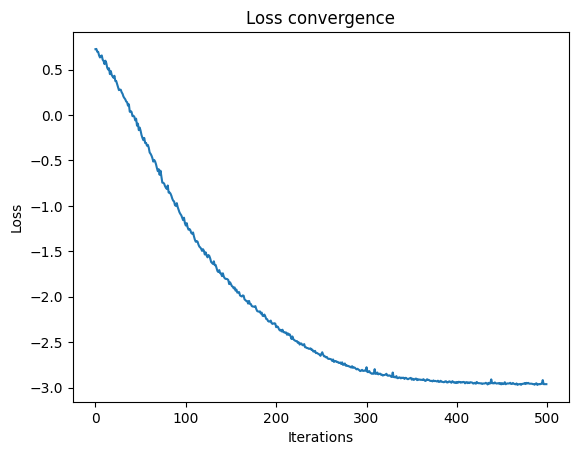

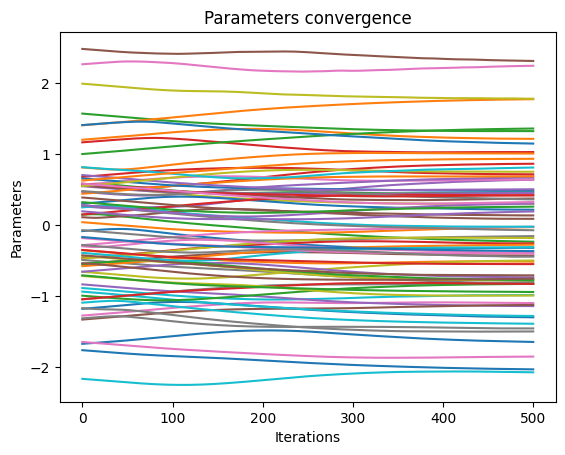

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

loss_image_path = f'./records/fraud/loss_{timestamp}.png'
params_text_path = f'./records/fraud/params_{timestamp}.txt'
params_image_path = f'./records/fraud/parameters_{timestamp}.png'

plt.style.use('default')
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss convergence")
plt.savefig(loss_image_path)
plt.show()


np.savetxt(params_text_path, est_params, delimiter=',')
plt.plot(param_history)
plt.xlabel("Iterations")
plt.ylabel("Parameters")
plt.title("Parameters convergence")
plt.savefig(params_image_path)
plt.show()


# Test

In [22]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

def radius(data, center):
    res = []
    res.append(abs(data - center)**2)
    return res


In [23]:
import time
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

trained_params = est_params
y_true = []
y_pred = []

def test(ntrain, latent_dim, cost_func):
    start_time = time.time()
    print(f"Starting test function with ntrain={ntrain}, latent_dim={latent_dim}, cost_func={cost_func} at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(start_time))}")
    
    if cost_func == 'svdd':
        for i in range(2):
            step_start_time = time.time()
            print(f"Processing class {i} at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(step_start_time))}")
            if i == ntrain:
                filter = np.where(Y_test == ntrain)
                test_data = X_test[filter]
                pred = np.asarray([QCNN(x, trained_params, U_params=num_params_conv, latent_dim=latent_dim, cost_fn=cost_func) for x in test_data])
                for j in range(len(pred)):
                    y_pred.append((pred**2).mean(axis=1)[j])
                    y_true.append(0)
            else:
                filter = np.where(Y_test == i)
                test_data = X_test[filter]
                pred = np.asarray([QCNN(x, trained_params, U_params=num_params_conv, latent_dim=latent_dim, cost_fn=cost_func) for x in test_data])
                for j in range(len(pred)):
                    y_pred.append((pred**2).mean(axis=1)[j])
                    y_true.append(1)
            step_end_time = time.time()
            print(f"Finished processing class {i} at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(step_end_time))} in {step_end_time - step_start_time:.2f} seconds")

    elif cost_func == 'qae':
        print("Calculating mean for QAE cost function")
        c_start_time = time.time()
        print(f"Started calculating mean at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(c_start_time))}")
        
        qae_cost_func = 'qae_test'

        c = np.mean(np.asarray([QCNN(x, trained_params, U_params=num_params_conv, latent_dim=latent_dim, cost_fn=qae_cost_func) for x in X_train]), axis=0)
        c_end_time = time.time()
        print(f"Calculated mean at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(c_end_time))} in {c_end_time - c_start_time:.2f} seconds")

        for i in range(2):
            step_start_time = time.time()
            print(f"Processing class {i} at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(step_start_time))}")
            if i == ntrain:
                filter = np.where(Y_test == ntrain)
                test_data = X_test[filter]
                pred = np.asarray([QCNN(x, trained_params, U_params=num_params_conv, latent_dim=latent_dim, cost_fn=qae_cost_func) for x in test_data])
                for j in range(len(pred)):
                    y_pred.append(((pred - c)**2).mean(axis=1)[j])
                    y_true.append(0)
            else:
                filter = np.where(Y_test == i)
                test_data = X_test[filter]
                pred = np.asarray([QCNN(x, trained_params, U_params=num_params_conv, latent_dim=latent_dim, cost_fn=qae_cost_func) for x in test_data])
                for j in range(len(pred)):
                    y_pred.append(((pred - c)**2).mean(axis=1)[j])
                    y_true.append(1)
            step_end_time = time.time()
            print(f"Finished processing class {i} at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(step_end_time))} in {step_end_time - step_start_time:.2f} seconds")

    print("Calculating ROC curve and AUC score")
    roc_start_time = time.time()
    print(f"Started calculating ROC and AUC at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(roc_start_time))}")
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    roc_end_time = time.time()
    print(f"Calculated ROC and AUC at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(roc_end_time))} in {roc_end_time - roc_start_time:.2f} seconds")
    
    end_time = time.time()
    print(f"Finished test function with AUC={auc} at {time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(end_time))} in {end_time - start_time:.2f} seconds")
    
    return auc, y_pred, y_true, fpr, tpr


auc, y_pred, y_true, fpr, tpr = test(ntrain, latent_dim, cost_func)
print("Test completed")


Starting test function with ntrain=0, latent_dim=3, cost_func=qae at 2024-06-16 16:59:43
Calculating mean for QAE cost function
Started calculating mean at 2024-06-16 16:59:43
Calculated mean at 2024-06-16 17:02:09 in 145.94 seconds
Processing class 0 at 2024-06-16 17:02:09
Finished processing class 0 at 2024-06-16 17:02:22 in 13.48 seconds
Processing class 1 at 2024-06-16 17:02:22
Finished processing class 1 at 2024-06-16 17:02:37 in 14.89 seconds
Calculating ROC curve and AUC score
Started calculating ROC and AUC at 2024-06-16 17:02:37
Calculated ROC and AUC at 2024-06-16 17:02:37 in 0.00 seconds
Finished test function with AUC=0.8119999999999999 at 2024-06-16 17:02:37 in 174.32 seconds
Test completed


(array([133.,  16.,  10.,  16.,   2.,   6.,   7.,   4.,   4.,   2.]),
 array([8.90119006e-05, 6.74975208e-03, 1.34104923e-02, 2.00712324e-02,
        2.67319726e-02, 3.33927128e-02, 4.00534530e-02, 4.67141932e-02,
        5.33749334e-02, 6.00356735e-02, 6.66964137e-02]),
 <BarContainer object of 10 artists>)

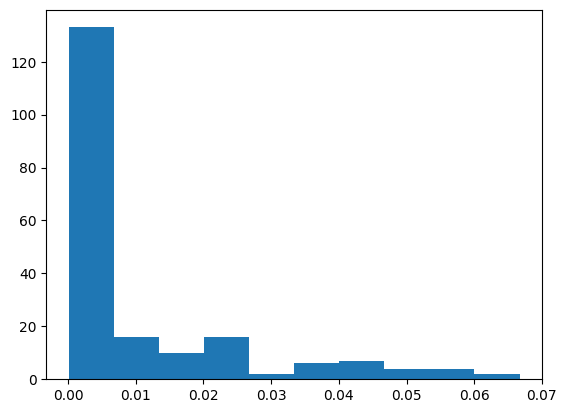

In [24]:
plt.hist(y_pred)

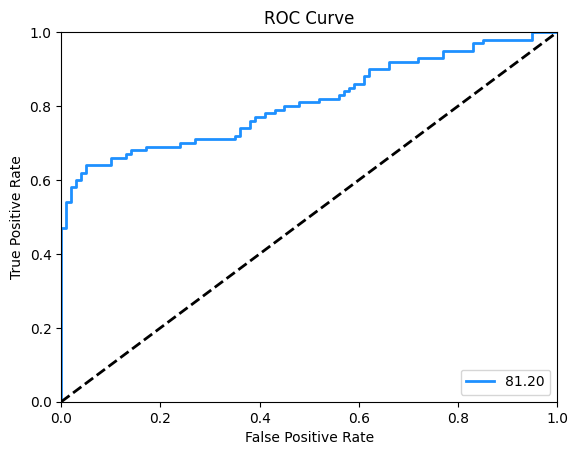

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import os
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='dodgerblue', lw=lw, label="{:.2f}".format(auc * 100))
plt.plot([0, 1], [0, 1], color="black", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
roc_image_path = f'./records/fraud/roc_curve_{timestamp}.png'
plt.savefig(roc_image_path)
plt.show()


def save_auc_to_file(auc, file_name):
    auc = "{:.2f}".format(auc * 100)
    directory = os.path.dirname(file_name)
    if not os.path.exists(directory):
        os.makedirs(directory)
    if not os.path.exists(file_name):
        with open(file_name, 'w') as f:
            f.write("AUC Results\n")
    with open(file_name, 'a') as f:
        f.write(str(auc) + "\n")

auc_file_path = "./records/fraud/auc.txt"
save_auc_to_file(auc, auc_file_path)
